ALY 6040: Data Mining Applications

Group C

Author: Pei-Yu Jheng, Yifan Wang, Jiahui Yang

Module 4 Final Project

Data Mining Analysis: Unveiling Insights into Cardiovascular Disease Risk Factors

Instructor: Justin Grosz

March 14,2024

In [1]:
#Install and Import necessary libraries
import bamboolib as bam

## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Warnings
import warnings 
warnings. filterwarnings('ignore')

## For Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objs as go
import matplotlib.pyplot as plt
colors = px.colors.sequential.Plasma_r
import seaborn as sns
from scipy.stats import ttest_ind

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA, IncrementalPCA

In [2]:
# import data 
data = pd.read_csv('CVD.csv')

# Step 1: Observations and Understanding on data

dataset name: Cardiovascular Diseases Risk Prediction Dataset   The 2021 BRFSS Dataset from CDC

Original dataset source: https://www.cdc.gov/brfss/annual_data/annual_2021.html

Preprocessed by kaggle poster @ALPHIREE,  he hand-picked 19 variables that relates to lifestyle factors of a person that can be contributed to being at risk with any form of Cardiovascular Diseases.

In [3]:
data

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [4]:
data.head()
# observation on head/feature of the data

  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0          150        32.66  

In [5]:
data.info()
# observation basic data infomation, 
# we can see there are missing value exist, and data types are: 12 object for 12 categorical features and 7 float64 for 7 numerical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       247084 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 305766 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  293412 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  305766 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   290323 non-nul

In [6]:
data.shape
# observation on size of data, we can see there are totaly more than Three hundred thousand rows and 19 columns 

(308854, 19)

In [7]:
# Checking if there are any null values in the dataset or not
#Find the missing value in each column
missing_values = data.isna().sum()
print("Missing values in each column:")
print(missing_values)

#Find the Number of rows in the dataset
num_rows = data.shape[0]
print("Number of rows in the dataset:", num_rows)
# observation the number of null values

Missing values in each column:
General_Health                      0
Checkup                         61770
Exercise                            0
Heart_Disease                    3088
Skin_Cancer                         0
Other_Cancer                    15442
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                     3088
Height_(cm)                         0
Weight_(kg)                     18531
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33973
FriedPotato_Consumption             0
dtype: int64
Number of rows in the dataset: 308854


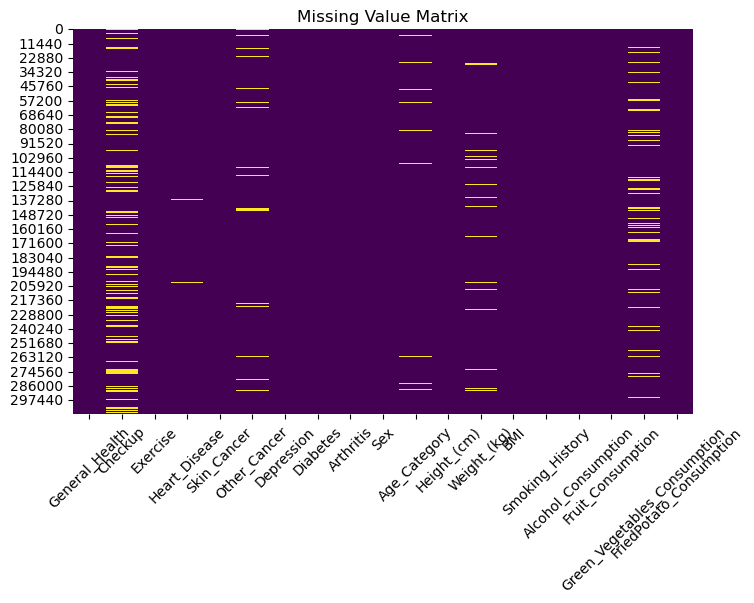

In [8]:
# Create a boolean DataFrame indicating missing values
missing_values_matrix = data.isnull()

# Plot the missing value matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(missing_values_matrix, cbar=False, cmap='viridis')
plt.title('Missing Value Matrix')
plt.xticks(rotation=45)
plt.show()

In [9]:
data.describe().transpose()
# 

                                 count        mean        std    min     25%  \
Height_(cm)                   308854.0  170.615249  10.658026  91.00  163.00   
Weight_(kg)                   290323.0   83.600757  21.358699  25.40   68.04   
BMI                           308854.0   28.626211   6.522323  12.02   24.21   
Alcohol_Consumption           308854.0    5.096366   8.199763   0.00    0.00   
Fruit_Consumption             308854.0   29.835200  24.875735   0.00   12.00   
Green_Vegetables_Consumption  274881.0   15.111084  14.933040   0.00    4.00   
FriedPotato_Consumption       308854.0    6.296616   8.582954   0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  241.00  
Weight_(kg)                    81.65   95.25  293.02  
BMI                            27.44   31.85   99.33  
Alcohol_Consumption             1.00    6.00   30.00  
Fruit_Consumption              30.00   30.00  120.00  
Green_Vegetables_Consumption 

In [10]:
data.describe(include='object').transpose()

                  count unique                   top    freq
General_Health   308854      5             Very Good  110395
Checkup          247084      5  Within the past year  191531
Exercise         308854      2                   Yes  239381
Heart_Disease    305766      2                    No  281037
Skin_Cancer      308854      2                    No  278860
Other_Cancer     293412      2                    No  265083
Depression       308854      2                    No  246953
Diabetes         308854      4                    No  259141
Arthritis        308854      2                    No  207783
Sex              308854      2                Female  160196
Age_Category     305766     13                 65-69   33108
Smoking_History  308854      2                    No  183590

In [11]:
# Count the duplicated rows in the DataFrame
data.duplicated().sum() 


49

In [12]:
# Calculate the number of unique values in each column of the DataFrame
data.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      523
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      74
FriedPotato_Consumption           69
dtype: int64

#### Analysing The Features

The answer is [Yes or No] for these questions

Heart Disease: Respondents that reported having coronary heart disease or mycardialinfarction.

Skin Cancer: Respondents that reported having skin cancer

Other Cancer: Respondents that reported having any other types of cancer

Depression:Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)

Diabetes: Respondents that reported having a diabetes. If yes, what type of diabetes it is/was.

Arthritis: Respondents that reported having an Arthritis.


### Interpretation of Results:
📏 Height_(cm): The height of the patients seems to follow a normal distribution, with the majority of patients having heights around 160 to 180 cm.

⚖️ Weight_(kg): The weight of the patients also appears to be normally distributed, with most patients weighing between approximately 60 and 100 kg.

📏⚖️ BMI: The distribution of Body Mass Index is somewhat right-skewed. A large number of patients have a BMI between 20 and 30, which falls within the normal to overweight range. However, there are also a significant number of patients with a BMI in the obese range (>30).

🍺 Alcohol_Consumption: This feature is heavily right-skewed. Most patients have low alcohol consumption, but there are a few patients with high consumption.

🍎 Fruit_Consumption: This feature is also right-skewed. A lot of patients consume fruits regularly, but a significant number consume them less frequently.

🥦 Green_Vegetables_Consumption: This feature appears to be normally distributed, with most patients consuming green vegetables moderately.

🍟 FriedPotato_Consumption: This feature is right-skewed. Many patients consume fried potatoes less frequently, while a few consume them more often.



In [13]:
# With the help of for loop, we will now check if there are any typos in the categorical columns or not
for col in data.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(data[col].unique())
    print('\n', '-'*80, '\n')

Column name: General_Health
['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']

 -------------------------------------------------------------------------------- 

Column name: Checkup
['Within the past 2 years' 'Within the past year' nan
 '5 or more years ago' 'Within the past 5 years' 'Never']

 -------------------------------------------------------------------------------- 

Column name: Exercise
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Heart_Disease
['No' 'Yes' nan]

 -------------------------------------------------------------------------------- 

Column name: Skin_Cancer
['No' 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Other_Cancer
['No' nan 'Yes']

 -------------------------------------------------------------------------------- 

Column name: Depression
['No' 'Yes']

 -------------------------------------------------------------------------------- 



# Step 2 : Data Cleaning 

In [14]:
data

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

### 1) proccessing the missing value

In [15]:
#Calculate the % of missing value in each column to total rows

missing_values_percentage = (data.isna().sum() / len(data)) * 100
missing_values_percentage_formatted = missing_values_percentage.map("{:.2f}%".format)
print("Percentage of missing values in each column relative to total rows:")
print(missing_values_percentage_formatted)

Percentage of missing values in each column relative to total rows:
General_Health                   0.00%
Checkup                         20.00%
Exercise                         0.00%
Heart_Disease                    1.00%
Skin_Cancer                      0.00%
Other_Cancer                     5.00%
Depression                       0.00%
Diabetes                         0.00%
Arthritis                        0.00%
Sex                              0.00%
Age_Category                     1.00%
Height_(cm)                      0.00%
Weight_(kg)                      6.00%
BMI                              0.00%
Smoking_History                  0.00%
Alcohol_Consumption              0.00%
Fruit_Consumption                0.00%
Green_Vegetables_Consumption    11.00%
FriedPotato_Consumption          0.00%
dtype: object


## for null values in Checkup

using mode to replace null
reason: 1, there are 20% null in checkup, so can not drop null,


2, The feature is categorical data (ordered categorical data), and the most appropriate treatment may be to use the mode to fill in these missing values. 
The mode is the value that appears most frequently in the data set. 
For categorical data, it is reasonable to use mode filling because it maintains the consistency of the data and the original distribution characteristics.

In [16]:
most_frequent_checkup = data['Checkup'].mode()[0]
most_frequent_checkup

'Within the past year'

In [17]:
data['Checkup'].fillna(most_frequent_checkup, inplace=True)

In [18]:
data.isnull().sum()
# observation the number of null values

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                    3088
Skin_Cancer                         0
Other_Cancer                    15442
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                     3088
Height_(cm)                         0
Weight_(kg)                     18531
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33973
FriedPotato_Consumption             0
dtype: int64

In [19]:
data.shape

(308854, 19)

## for null values in Heart_Disease

Heart_Disease is our target value, so any replacement will influence the accuracy of prediction

and there are only nearly 1% null value in this feature, so we decide to drop the null

In [20]:
data.dropna(subset=['Heart_Disease'], inplace=True)

In [21]:
data

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

In [22]:
data.isnull().sum()
# observation the number of null values

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                       0
Skin_Cancer                         0
Other_Cancer                    15304
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                     3053
Height_(cm)                         0
Weight_(kg)                     18354
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33648
FriedPotato_Consumption             0
dtype: int64

## for null values in Other_Cancer

There are 5% null in Other_Cancer, and we decide to use mode

Reason: 

1, we can not This is an estimate of whether the patient has other cancers. 
We cannot assume that the patient has cancer without any information. 
We can only assume that the patient does not have other cancers without any information about the cancer.


2, there are 265083/293412 of result are "NO", so we choose to replace  them with Mode (NO)

In [23]:
other_cancer_mode = data['Other_Cancer'].mode()[0]
other_cancer_mode

'No'

In [24]:
data['Other_Cancer'].fillna(other_cancer_mode, inplace=True)

In [25]:
data.isnull().sum()
# observation the number of null values

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                       0
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                     3053
Height_(cm)                         0
Weight_(kg)                     18354
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33648
FriedPotato_Consumption             0
dtype: int64

## null in Age_Category

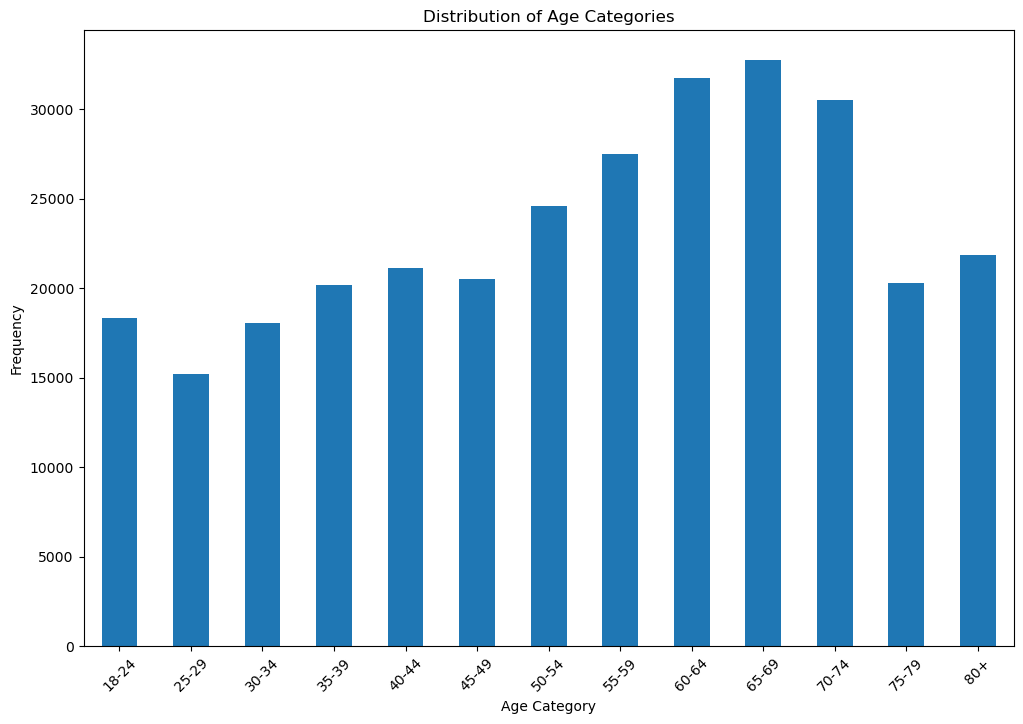

In [26]:
age_category_counts = data['Age_Category'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
age_category_counts.plot(kind='bar')
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We decide to drop null in age category

Reason:

1.  1% null
2.  The age distribution is relatively even.
3.  The age distribution cannot be averaged, the average is not accurate in this category
4.  Median In this category, since the distribution is relatively even, the median will be the age of middle-aged people, which cannot represent people of all ages. This is not accurate.
5. In the same way, people with a mode of 65 - 69 only account for 10% of the total. They cannot be replaced by the mode, which is inaccurate.

In [27]:
data.dropna(subset=['Age_Category'], inplace=True)

In [28]:
data.isnull().sum()
# observation the number of null values

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                       0
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                        0
Height_(cm)                         0
Weight_(kg)                     18164
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33311
FriedPotato_Consumption             0
dtype: int64

null in Weight_(kg)

In [29]:
# Calculate skewness and kurtosis
skewness = data['Weight_(kg)'].skew()
kurtosis = data['Weight_(kg)'].kurt()

In [30]:
# Output skewness and kurtosis

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 1.066122730296927
Kurtosis: 2.626635011645318


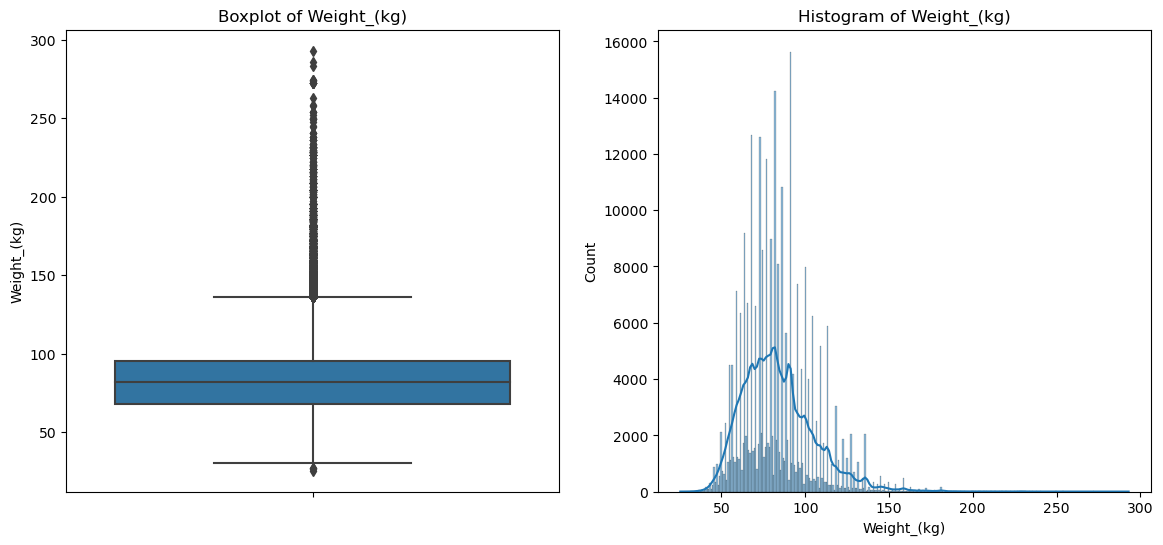

In [31]:
# Draw box plots and histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['Weight_(kg)'])
plt.title('Boxplot of Weight_(kg)')

plt.subplot(1, 2, 2)
sns.histplot(data['Weight_(kg)'], kde=True)
plt.title('Histogram of Weight_(kg)')

plt.show()

    Skewness: 
    A value of 1.066122730296927 indicates that the data has positive skew (right skew), 
    meaning the data has a longer right tail. The center of the data is skewed towards lower weight values, 
    while higher weight values are less but more spread out.
    
    Kurtosis: 
    A value of 2.626635011645318 indicates that the data distribution 
    is steeper than a normal distribution (a normal distribution has a kurtosis of 3). 
    The kurtosis value is slightly less than 3, 
    indicating that the data distribution is relatively flat, 
    but still has a certain degree of sharpness.
    
    Interpretation

    Skewness: Positive skewness in the data indicates that we may have outliers on the higher weight side. 
    These higher weight values stretch the right tail of the distribution and may include some extreme outliers.
    
    Kurtosis: Although the kurtosis value is slightly smaller than the kurtosis of the normal distribution, 
    its value still indicates that the data distribution has a certain degree of sharpness. 
    The flatness of the data distribution indicates that most data points are clustered around the mean, 
    but there are also a certain number of data points that are far from the mean, which may be outliers.
    
    
    
    Filling missing values: 
    
    Considering the distribution characteristics of the data, 
    I would choose to use the median to fill the missing values of Weight_(kg) 
    
    because the median is not as susceptible to skewness and outliers as the mean.
    

In [32]:
# Calculate the median of Weight_(kg)
weight_median = data['Weight_(kg)'].median()

In [33]:
# Use the median to fill missing values in Weight_(kg)
data['Weight_(kg)'].fillna(weight_median, inplace=True)

In [34]:
data.isnull().sum()
# observation the number of null values

General_Health                      0
Checkup                             0
Exercise                            0
Heart_Disease                       0
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Diabetes                            0
Arthritis                           0
Sex                                 0
Age_Category                        0
Height_(cm)                         0
Weight_(kg)                         0
BMI                                 0
Smoking_History                     0
Alcohol_Consumption                 0
Fruit_Consumption                   0
Green_Vegetables_Consumption    33311
FriedPotato_Consumption             0
dtype: int64

## for null in Green_Vegetables_Consumption

In [35]:
data['Green_Vegetables_Consumption'].describe().transpose()
# 

count    269402.000000
mean         15.114465
std          14.931761
min           0.000000
25%           4.000000
50%          12.000000
75%          20.000000
max         128.000000
Name: Green_Vegetables_Consumption, dtype: float64

In [36]:
    """

    Mean imputation is suitable 
    when the data distribution is close to a normal distribution without too many extreme values. 
    
    Since the standard deviation of Green_Vegetables_Consumption (14.933) is relatively large relative to the mean (15.111), 
    
    using the mean may be affected by extreme values.


    """

'\n\nMean imputation is suitable \nwhen the data distribution is close to a normal distribution without too many extreme values. \n\nSince the standard deviation of Green_Vegetables_Consumption (14.933) is relatively large relative to the mean (15.111), \n\nusing the mean may be affected by extreme values.\n\n\n'

In [37]:
skewness = data['Green_Vegetables_Consumption'].skew()
kurtosis = data['Green_Vegetables_Consumption'].kurt()

In [38]:
# Output skewness and kurtosis

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 2.413067437651426
Kurtosis: 9.42302556969756


According to the actual calculation results you provided, 

the skewness of Green_Vegetables_Consumption is 2.41 and the kurtosis is 9.42. 

These results show:

Skewness
Skewness greater than 0, especially values exceeding 2, 
indicates that the data distribution has significant positive skew. 
This means that most data values are concentrated in the lower consumption areas,
while there are relatively few but far away values for higher consumption, 
causing the tail of the distribution to extend towards higher consumption.

Kurtosis
A kurtosis value greater than 0, especially a value close to or above 9, 
indicates that the distribution has a sharper peak and thicker tail than a normal distribution. 
This type of distribution indicates that there are relatively many extreme values (i.e. very high consumption), 
far from the mean.

Data filling suggestions
Since the data is significantly skewed and has high kurtosis, 
this indicates that there are a significant number of extreme high values in the data.
In this case, using averages to impute missing values may be affected by extreme values, 
resulting in inaccurate imputed data. 


Therefore, it is more appropriate to use the median to fill missing values 

because the median is insensitive to extreme values and can better represent the central trend of most data.


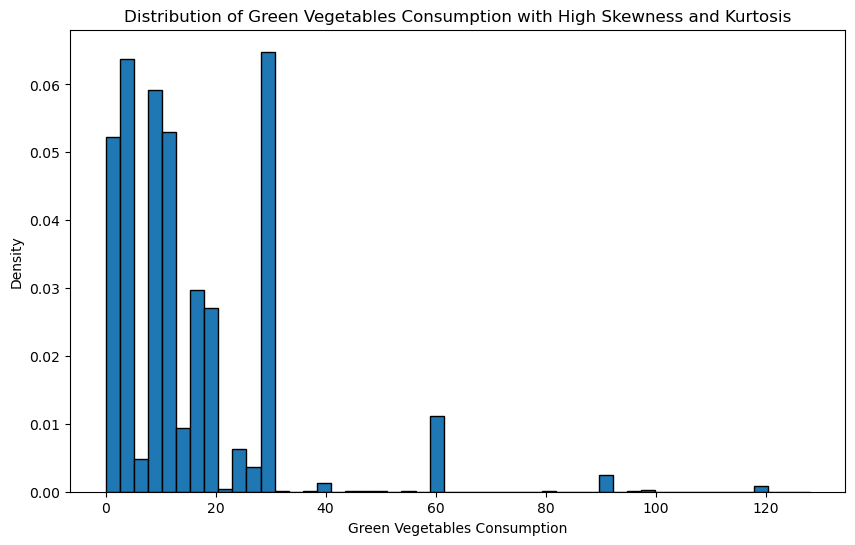

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(data['Green_Vegetables_Consumption'], bins=50, edgecolor='black', density=True)
plt.title('Distribution of Green Vegetables Consumption with High Skewness and Kurtosis')
plt.xlabel('Green Vegetables Consumption')
plt.ylabel('Density')
plt.grid(False)
plt.show()

In [40]:
# Use median to fill missing values in Green_Vegetables_Consumption
green_veg_median = data['Green_Vegetables_Consumption'].median()
data['Green_Vegetables_Consumption'].fillna(green_veg_median, inplace=True)


In [41]:
data.isnull().sum()
# observation the number of null values

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

### 2) Check Duplicate Values

In [42]:
#check duplicate values
data.duplicated().sum()

84

In [43]:
#  There are very few duplicate values and we decided to keep them, in order to keep the data closer to the original records

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302713 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                302713 non-null  object 
 1   Checkup                       302713 non-null  object 
 2   Exercise                      302713 non-null  object 
 3   Heart_Disease                 302713 non-null  object 
 4   Skin_Cancer                   302713 non-null  object 
 5   Other_Cancer                  302713 non-null  object 
 6   Depression                    302713 non-null  object 
 7   Diabetes                      302713 non-null  object 
 8   Arthritis                     302713 non-null  object 
 9   Sex                           302713 non-null  object 
 10  Age_Category                  302713 non-null  object 
 11  Height_(cm)                   302713 non-null  int64  
 12  Weight_(kg)                   302713 non-nul

### 3) Handle outliers

In [45]:
df = data.copy()


In [46]:
data.describe().transpose()

                                 count        mean        std    min     25%  \
Height_(cm)                   302713.0  170.608894  10.657451  91.00  163.00   
Weight_(kg)                   302713.0   83.471258  20.707621  25.40   68.04   
BMI                           302713.0   28.622740   6.520580  12.02   24.21   
Alcohol_Consumption           302713.0    5.098185   8.201014   0.00    0.00   
Fruit_Consumption             302713.0   29.836016  24.875286   0.00   12.00   
Green_Vegetables_Consumption  302713.0   14.771744  14.119942   0.00    5.00   
FriedPotato_Consumption       302713.0    6.298953   8.584655   0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  241.00  
Weight_(kg)                    81.65   93.44  293.02  
BMI                            27.44   31.83   99.33  
Alcohol_Consumption             1.00    6.00   30.00  
Fruit_Consumption              30.00   30.00  120.00  
Green_Vegetables_Consumption 

In [47]:
for col in ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define conditions for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Mark outliers as NaN for subsequent processing
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan

# After this step you can decide whether to delete these rows containing NaNs or fill the NaNs with some value such as the median of the column
# Fill NaN with median
for col in ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']:
    median = df[col].median()
    df[col].fillna(median, inplace=True)



    First use the IQR method to identify outliers for each numeric column and replace these outliers with NaN. 
    Then, choose to populate these NaN values.
    We use the median of each column to fill NaN values 
    because the median is insensitive to outliers and can better maintain the overall distribution of the data.


In [48]:
df.describe().transpose()

                                 count        mean        std     min     25%  \
Height_(cm)                   302713.0  170.602888  10.416484  142.00  163.00   
Weight_(kg)                   302713.0   81.784138  17.588420   30.00   68.04   
BMI                           302713.0   27.947090   5.276335   12.87   24.21   
Alcohol_Consumption           302713.0    2.185456   3.617354    0.00    0.00   
Fruit_Consumption             302713.0   17.861027   9.728453    0.00   12.00   
Green_Vegetables_Consumption  302713.0   12.825422   9.268388    0.00    5.00   
FriedPotato_Consumption       302713.0    4.626712   4.063226    0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  200.00  
Weight_(kg)                    81.65   90.72  131.54  
BMI                            27.37   31.14   43.25  
Alcohol_Consumption             0.00    3.00   15.00  
Fruit_Consumption              16.00   30.00   56.00  
Green_Vegetables_Cons

In [49]:
columns_to_replace = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Replace each column
for col in columns_to_replace:
    data[col] = df[col]
    

After using the IQR method to deal with outliers, 
the data distribution of Alcohol_Consumption and Fruit_Consumption has been significantly changed, 
so we absolutely retain the original data in Alcohol_Consumption and Fruit_Consumption to reduce the impact of the IQR method on the real data. 
We add the other five features : 
Height_(cm)', 'Weight_(kg)', 'BMI', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption' 
have been implemented using the IQR method to handle outliers

In [50]:
data.describe().transpose()

                                 count        mean        std     min     25%  \
Height_(cm)                   302713.0  170.602888  10.416484  142.00  163.00   
Weight_(kg)                   302713.0   81.784138  17.588420   30.00   68.04   
BMI                           302713.0   27.947090   5.276335   12.87   24.21   
Alcohol_Consumption           302713.0    5.098185   8.201014    0.00    0.00   
Fruit_Consumption             302713.0   29.836016  24.875286    0.00   12.00   
Green_Vegetables_Consumption  302713.0   12.825422   9.268388    0.00    5.00   
FriedPotato_Consumption       302713.0    4.626712   4.063226    0.00    2.00   

                                 50%     75%     max  
Height_(cm)                   170.00  178.00  200.00  
Weight_(kg)                    81.65   90.72  131.54  
BMI                            27.37   31.14   43.25  
Alcohol_Consumption             1.00    6.00   30.00  
Fruit_Consumption              30.00   30.00  120.00  
Green_Vegetables_Cons

### 4) Encoding Categorical Variables

In [51]:
value_map1 = {
    'Poor' : 0,
    'Fair' : 1,
    'Good' : 2,
    'Excellent' : 3,
    'Very Good' : 4,
}
value_map2 = {
    'Never' : 0,
    '5 or more years ago' : 1,
    'Within the past 5 years' : 2,
    'Within the past 2 years' : 3,
    'Within the past year' : 4,
}
value_map3 = {
    'No' : 0,
    'Yes' : 1,
}
value_map4 = {
    'Male' : 0,
    'Female' : 1,
}
value_map5 = {
    '18-24' : 0,
    '25-29' : 1,
    '30-34' : 3,
    '35-39' : 4,
    '40-44' : 5,
    '45-49' : 6,
    '50-54' : 7,
    '55-59' : 8,
    '60-64' : 9,
    '65-69' : 10,
    '70-74' : 11,
    '75-79' : 12,
    '80+' : 13,
}
value_map6 = {
    'No' : 0,
    'No, pre-diabetes or borderline diabetes' : 1,
    'Yes' : 2,
    'Yes, but female told only during pregnancy' : 3,
}
for index, row in data.iterrows():
    if row['General_Health'] in value_map1:
        data.at[index, 'General_Health1'] = value_map1[row['General_Health']]
    if row['Checkup'] in value_map2:
        data.at[index, 'Checkup1'] = value_map2[row['Checkup']]
    if row['Exercise'] in value_map3:
        data.at[index, 'Exercise1'] = value_map3[row['Exercise']]
    if row['Heart_Disease'] in value_map3:
        data.at[index, 'Heart_Disease1'] = value_map3[row['Heart_Disease']]
    if row['Skin_Cancer'] in value_map3:
        data.at[index, 'Skin_Cancer1'] = value_map3[row['Skin_Cancer']]
    if row['Other_Cancer'] in value_map3:
        data.at[index, 'Other_Cancer1'] = value_map3[row['Other_Cancer']]        
    if row['Depression'] in value_map3:
        data.at[index, 'Depression1'] = value_map3[row['Depression']]
    if row['Diabetes'] in value_map6:
        data.at[index, 'Diabetes1'] = value_map6[row['Diabetes']]
    if row['Arthritis'] in value_map3:
        data.at[index, 'Arthritis1'] = value_map3[row['Arthritis']]
    if row['Sex'] in value_map4:
        data.at[index, 'Sex1'] = value_map4[row['Sex']]
    if row['Age_Category'] in value_map5:
        data.at[index, 'Age_Category1'] = value_map5[row['Age_Category']]    
    if row['Smoking_History'] in value_map3:
        data.at[index, 'Smoking_History1'] = value_map3[row['Smoking_History']]      
data

data.drop(columns=['General_Health','Checkup','Exercise','Heart_Disease','Skin_Cancer','Other_Cancer','Depression',
                  'Diabetes','Arthritis','Sex','Age_Category','Smoking_History'], inplace=True)


In [52]:
data.describe().transpose()

                                 count        mean        std     min     25%  \
Height_(cm)                   302713.0  170.602888  10.416484  142.00  163.00   
Weight_(kg)                   302713.0   81.784138  17.588420   30.00   68.04   
BMI                           302713.0   27.947090   5.276335   12.87   24.21   
Alcohol_Consumption           302713.0    5.098185   8.201014    0.00    0.00   
Fruit_Consumption             302713.0   29.836016  24.875286    0.00   12.00   
Green_Vegetables_Consumption  302713.0   12.825422   9.268388    0.00    5.00   
FriedPotato_Consumption       302713.0    4.626712   4.063226    0.00    2.00   
General_Health1               302713.0    2.706422   1.172275    0.00    2.00   
Checkup1                      302713.0    3.694103   0.745812    0.00    4.00   
Exercise1                     302713.0    0.774939   0.417623    0.00    1.00   
Heart_Disease1                302713.0    0.080849   0.272603    0.00    0.00   
Skin_Cancer1                

In [53]:
data.isna().sum()

Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
General_Health1                 0
Checkup1                        0
Exercise1                       0
Heart_Disease1                  0
Skin_Cancer1                    0
Other_Cancer1                   0
Depression1                     0
Diabetes1                       0
Arthritis1                      0
Sex1                            0
Age_Category1                   0
Smoking_History1                0
dtype: int64

# Step 3: Variable Selection and EDA

### Q1: If having a habit on exercise decreases the likelihood of getting heart disease? (T-test)

In [54]:
# Separate the data for those who own a Keurig and those who don't
habit_exercise = data[data["Exercise1"] == 1]["Heart_Disease1"]
no_exercise = data[data["Exercise1"] != 1]["Heart_Disease1"]

# Perform the t-test
t_stat, p_value = ttest_ind(habit_exercise, no_exercise)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: having a habit on exercise decreases the likelihood of getting heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of getting heart disease based on having a habit on exercise.")


T-statistic: -53.47564507144645
P-value: 0.0
Reject the null hypothesis: having a habit on exercise decreases the likelihood of getting heart disease.


### Q2: If having a high BMI increases the likelihood of getting heart disease? (T-test)

In [55]:
# Separate the data for those who own a Keurig and those who don't
high_BMI = data[data["BMI"] >28]["Heart_Disease1"]
low_BMI = data[data["BMI"] <= 28]["Heart_Disease1"]

# Perform the t-test
t_stat, p_value = ttest_ind(high_BMI, low_BMI)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret results based on p-value

if p_value < 0.05:
    print("Reject the null hypothesis: High BMI increases the likelihood of getting heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of getting heart disease based on BMI.")

T-statistic: 21.373434360753038
P-value: 2.806836359436406e-101
Reject the null hypothesis: High BMI increases the likelihood of getting heart disease.


### Q3: If having a high Age increases the likelihood of getting heart disease? (T-test)

In [56]:
#fine the mean of the age group in this dataset

# Calculate the mean of the age group
mean_value = data['Age_Category1'].mean()

# Print the mean value
print("Mean of the age group:", mean_value)

Mean of the age group: 7.4259116721118685


In [57]:
# Separate the data for those who own a Keurig and those who don't
older = data[data["Age_Category1"] > 7]["Heart_Disease1"]
younger = data[data["Age_Category1"] <= 7]["Heart_Disease1"]

# Perform the t-test
t_stat, p_value = ttest_ind(older, younger)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret results based on p-value

if p_value < 0.05:
    print("Reject the null hypothesis: People older than 45 increases the likelihood of getting heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of getting heart disease based on Age Category.")

T-statistic: 112.5937767311332
P-value: 0.0
Reject the null hypothesis: People older than 45 increases the likelihood of getting heart disease.


### Q4: If having Diabetes increases the likelihood of getting heart disease? (T-test)

In [58]:
# Separate the data for those who own a Keurig and those who don't
having_diabetes = data[data["Diabetes1"] >= 2]["Heart_Disease1"]
no_diabetes = data[data["Diabetes1"] < 2]["Heart_Disease1"]

# Perform the t-test
t_stat, p_value = ttest_ind(having_diabetes, no_diabetes)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: having diabetes increases the likelihood of getting heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of getting heart disease based on having diabetes or not.")


T-statistic: 96.3260870751159
P-value: 0.0
Reject the null hypothesis: having diabetes increases the likelihood of getting heart disease.


### Q5: If having Arthritis increases the likelihood of getting heart disease? (T-test)

In [59]:
# Separate the data for those who own a Keurig and those who don't
having_arthritis = data[data["Arthritis1"] == 1]["Heart_Disease1"]
no_arthritis = data[data["Arthritis1"] != 1]["Heart_Disease1"]

# Perform the t-test
t_stat, p_value = ttest_ind(having_arthritis, no_arthritis)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: having arthritis increases the likelihood of getting heart disease.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of getting heart disease based on having arthritis or not.")


T-statistic: 85.72582918735579
P-value: 0.0
Reject the null hypothesis: having arthritis increases the likelihood of getting heart disease.


## Correlation Matrix

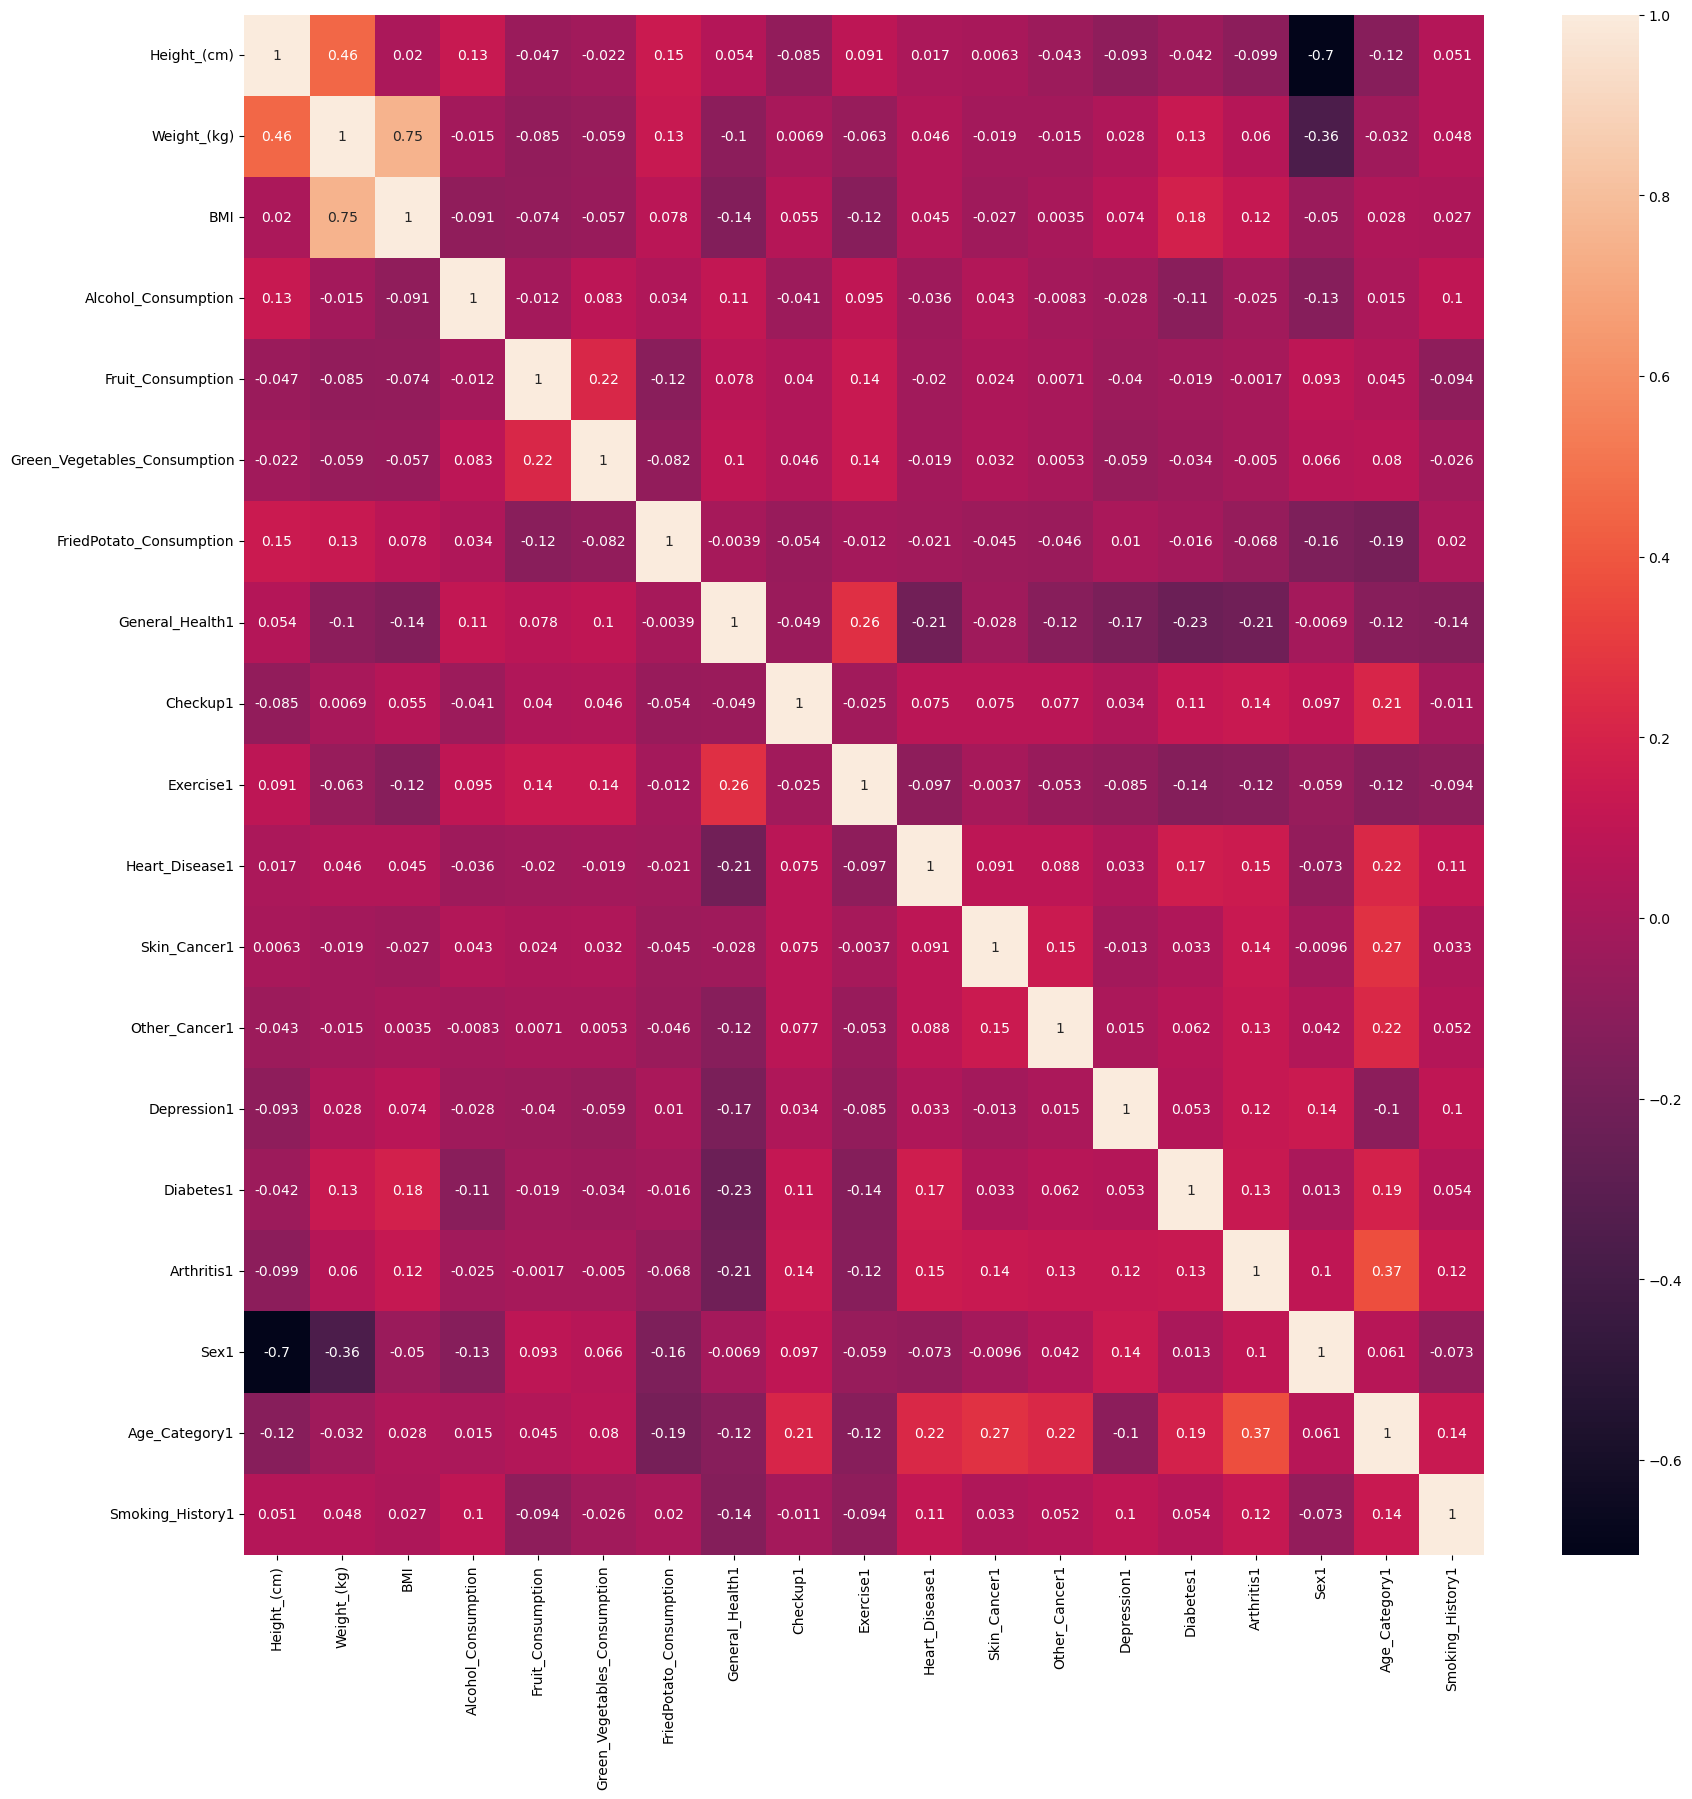

In [60]:
plt.figure(figsize=(20, 20))

sns.heatmap(data.corr(), annot= True);


    It can be seen from the figure that Heart_Disease has the greatest positive correlation with 
    Diabetes and Arthritis, Smoking_History, 
    the greatest negative correlation with Exercise, Alcohol_Consumption, FriedPotato_Consumption, 
    and General_Health, 
    
    and the least correlation with Age_Category, Height_(cm)
    

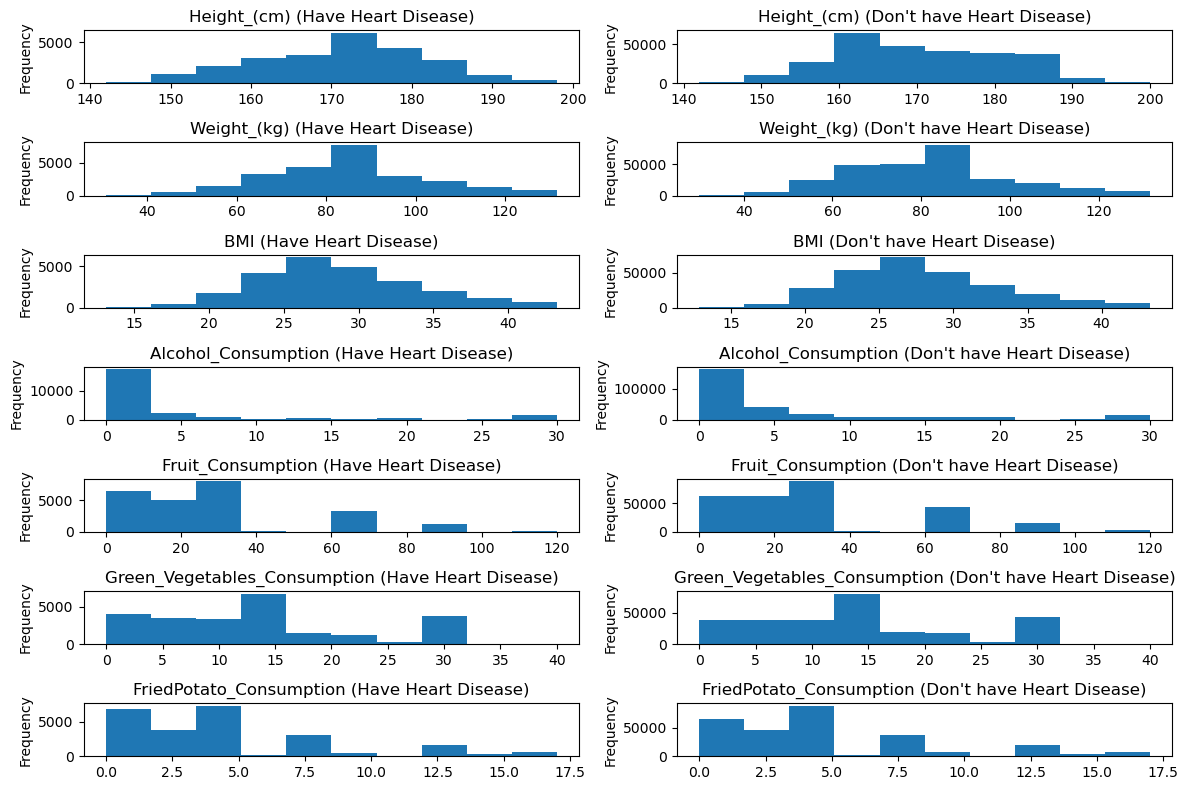

In [61]:
# Distribution of numerical variables
import matplotlib.pyplot as plt

numerical_vars = ["Height_(cm)", "Weight_(kg)", "BMI","Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption", "FriedPotato_Consumption"]

fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(12, 8))
for i, var in enumerate(numerical_vars):
    data[data["Heart_Disease1"] == 1][var].plot(kind="hist", ax=axes[i, 0], title=f"{var} (Have Heart Disease)")
    data[data["Heart_Disease1"] == 0][var].plot(kind="hist", ax=axes[i, 1], title=f"{var} (Don't have Heart Disease)")

plt.tight_layout()
plt.show()

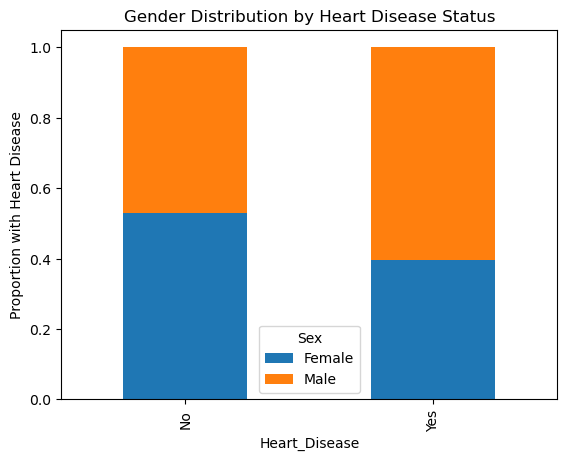

In [62]:
# Visualization 1: Grouped bar chart
grouped_bar = df.groupby("Heart_Disease")["Sex"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.ylabel("Proportion with Heart Disease")
plt.title("Gender Distribution by Heart Disease Status")
plt.show()

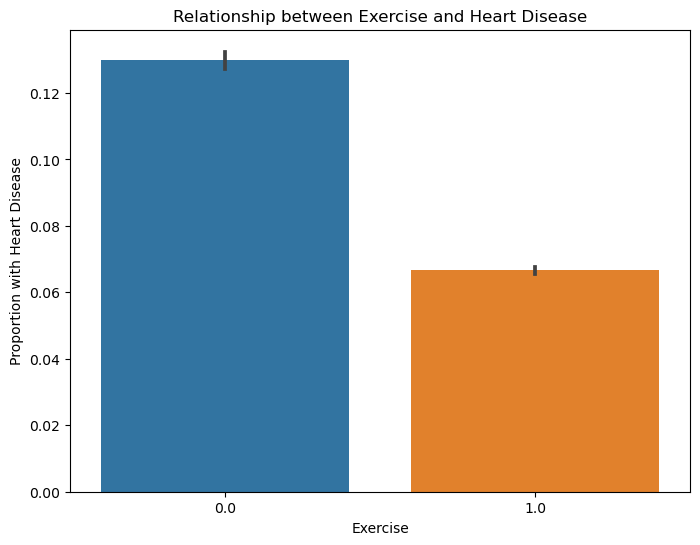

In [63]:
# Visualization 2: Relationship between Exercise and Heart Disease
plt.figure(figsize=(8, 6))
sns.barplot(x="Exercise1", y="Heart_Disease1", data=data)
plt.title('Relationship between Exercise and Heart Disease')
plt.xlabel('Exercise')
plt.ylabel('Proportion with Heart Disease')
plt.show()

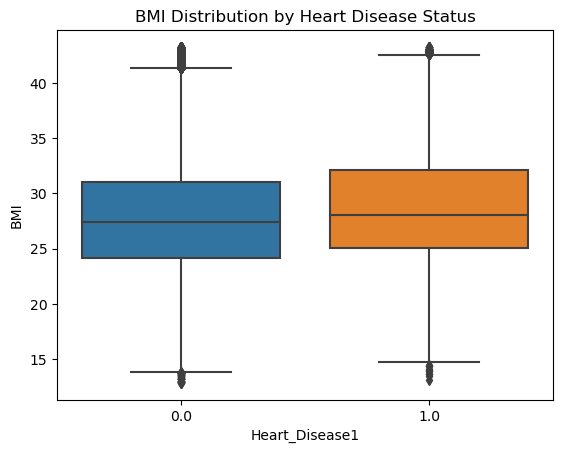

In [64]:
# Relationship between BMI distribution and heart disease
sns.boxplot(x='Heart_Disease1', y='BMI', data=data)
plt.title('BMI Distribution by Heart Disease Status')
plt.show()

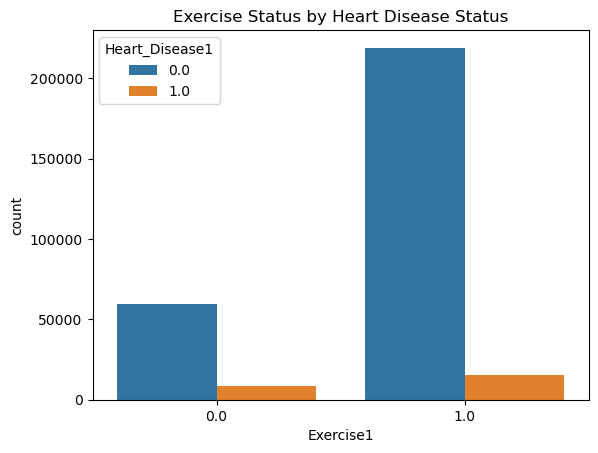

In [65]:
# The relationship between exercise and heart disease
sns.countplot(x='Exercise1', hue='Heart_Disease1', data=data)
plt.title('Exercise Status by Heart Disease Status')
plt.show()

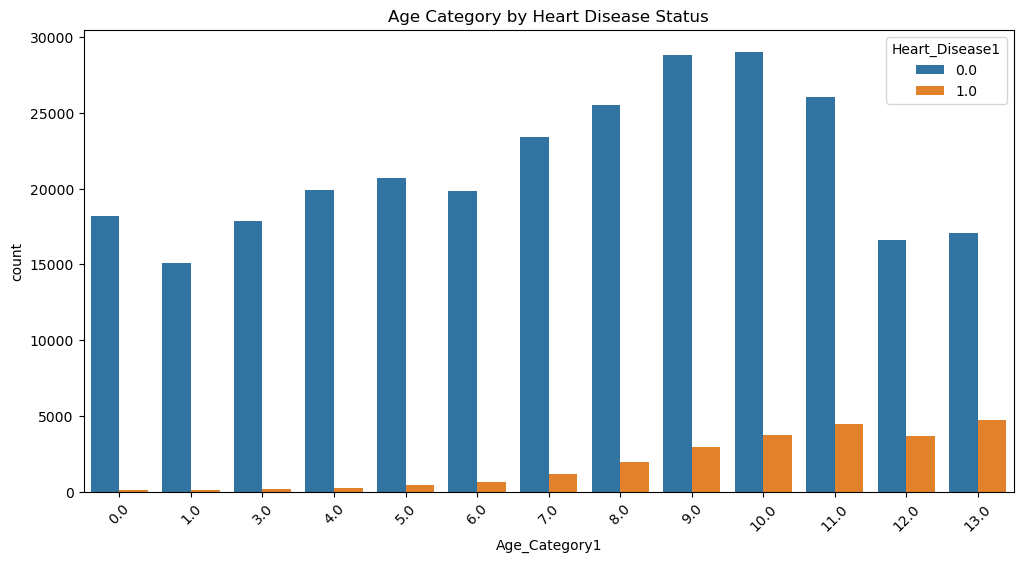

In [66]:
# The relationship between Age_Category and heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='Age_Category1', hue='Heart_Disease1', data=data, order=sorted(data['Age_Category1'].unique()))
plt.title('Age Category by Heart Disease Status')
plt.xticks(rotation=45)
plt.show()

BMI and heart disease: High BMI values may be associated with heart disease status. The difference in distribution between BMI and whether you have heart disease can be observed through box plots.
Exercise and Heart Disease: People who exercise regularly may have lower rates of heart disease. A bar chart shows the relationship between exercise habits and heart disease status.
Age and heart disease: The distribution of heart disease may vary significantly among different age groups, and the incidence of heart disease may be higher in older age groups.


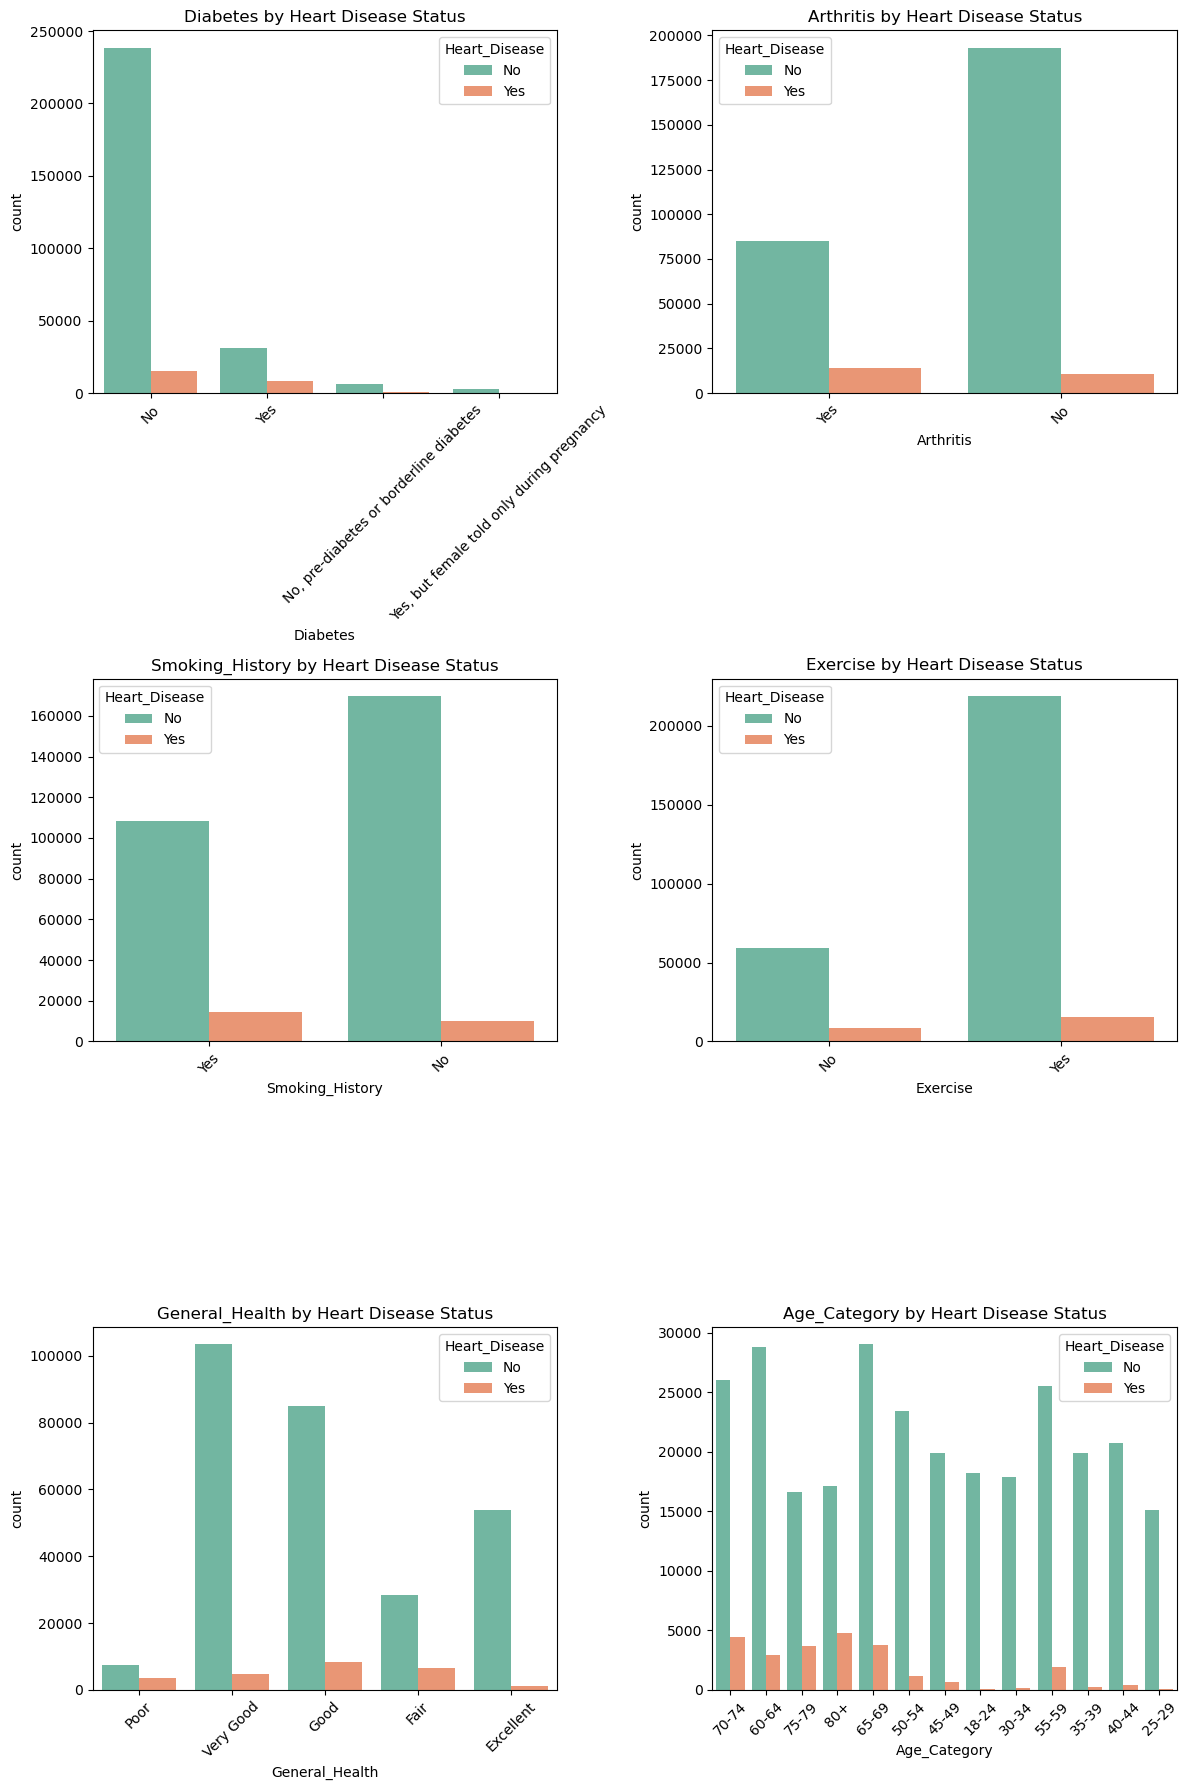

In [67]:
categorical_vars = ['Diabetes', 'Arthritis', 'Smoking_History', 'Exercise', 'General_Health', 'Age_Category']

plt.figure(figsize=(12, 18))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=var, hue='Heart_Disease', data=df, palette='Set2')
    plt.title(f'{var} by Heart Disease Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

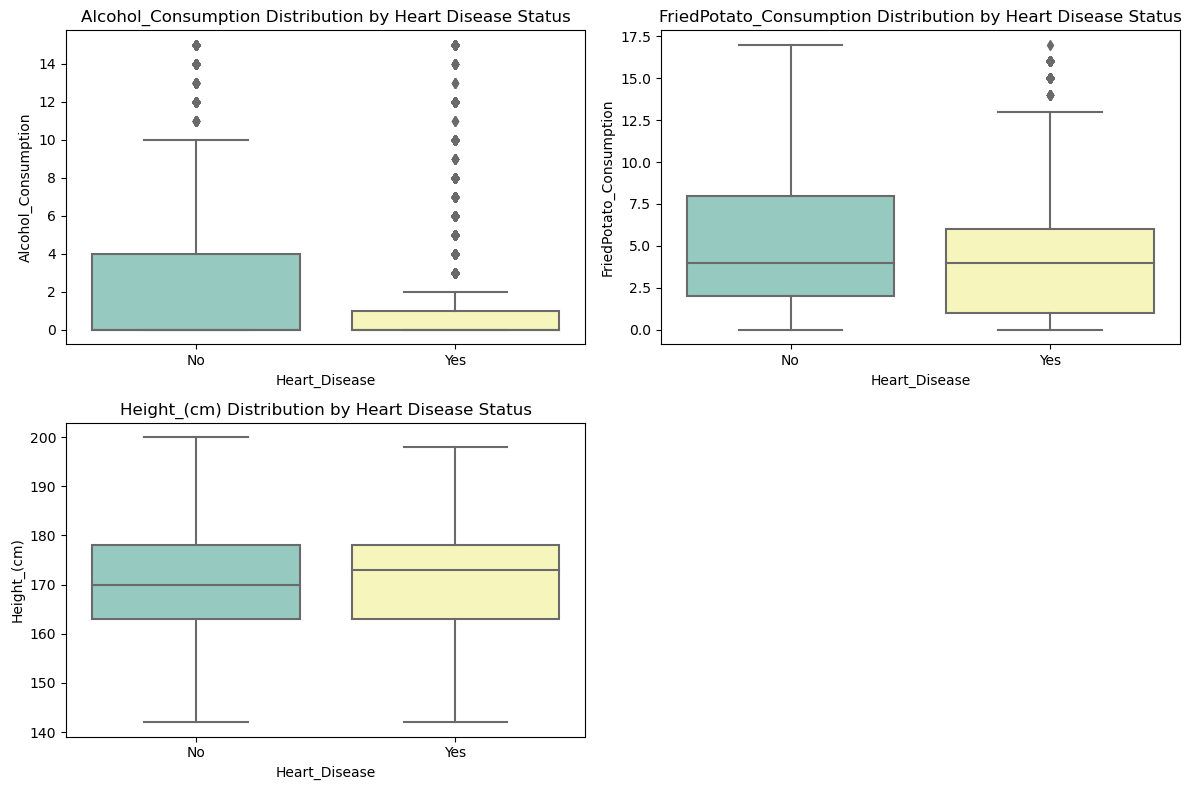

In [68]:
numeric_vars = ['Alcohol_Consumption', 'FriedPotato_Consumption', 'Height_(cm)']

plt.figure(figsize=(12, 8))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Heart_Disease', y=var, data=df, palette='Set3')
    plt.title(f'{var} Distribution by Heart Disease Status')
plt.tight_layout()
plt.show()

Through these graphs, 
we can observe possible relationships between different variables and heart disease status. 
For example, higher rates of heart disease may be observed in specific categories of some categorical variables, 
while the distribution of numeric variables may differ between heart disease patients and non-patients. 
These findings help us understand which factors may be associated with increased risk of heart disease, thereby providing support for subsequent analysis and model building.


# Step 4: Building Logistics Regression Model

In [69]:
# # Prepare the data, 'df' is our DataFrame with the binary variable 'Purchased' and other features
X = data.drop(['Heart_Disease1'], axis=1)  # Features
y = data['Heart_Disease1']  # Target variable

# Split the data into training and test sets, maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train a logistic regression model
model.fit(X_train, y_train)

# the intercept of model
model.intercept_

array([-0.07947376])

In [70]:
# the slope of model
coefficients = model.coef_
print("Coefficients:")
for i, coef in enumerate(coefficients[0]):
    print(f"  {X.columns[i]}: {coef}")


Coefficients:
  Height_(cm): -0.022218579286821548
  Weight_(kg): 0.006471296854940231
  BMI: -0.017087745085023403
  Alcohol_Consumption: -0.008612318203940688
  Fruit_Consumption: -0.0005610249432903184
  Green_Vegetables_Consumption: -0.0005258805762270222
  FriedPotato_Consumption: -0.005814503470455383
  General_Health1: -0.43179417355054406
  Checkup1: 0.011938362617733985
  Exercise1: -0.054134078448817846
  Skin_Cancer1: 0.1373190140312512
  Other_Cancer1: 0.05907808070802722
  Depression1: 0.13471980466994252
  Diabetes1: 0.40618601640602264
  Arthritis1: 0.2573273851727554
  Sex1: -0.889115391091459
  Age_Category1: 0.25935502338701516
  Smoking_History1: 0.4468049489077731


In [71]:
import statsmodels.api as sm

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Create a summary table
summary_table = result.summary()
print(summary_table)


Optimization terminated successfully.
         Current function value: 0.223991
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Heart_Disease1   No. Observations:               242170
Model:                          Logit   Df Residuals:                   242151
Method:                           MLE   Df Model:                           18
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.2039
Time:                        18:10:20   Log-Likelihood:                -54244.
converged:                       True   LL-Null:                       -68139.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.8836      0.236    -16.462      0.000

In [72]:
# Make predictions on the test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#Perfromance Evaluation
train_score = accuracy_score(y_train, train_pred)*100
print("Accuracy:", train_score)

#Perfromance Evaluation
test_score = accuracy_score(y_test, test_pred)*100
print("Accuracy:", test_score)

# Classification report
print("\nClassification Report of Train Set:")
print(classification_report(y_train, train_pred))

print("\nClassification Report of Test Set:")
print(classification_report(y_test, test_pred))


Accuracy: 91.89288516331503
Accuracy: 91.98090613283121

Classification Report of Train Set:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    222538
         1.0       0.50      0.05      0.10     19632

    accuracy                           0.92    242170
   macro avg       0.71      0.52      0.53    242170
weighted avg       0.89      0.92      0.89    242170


Classification Report of Test Set:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     55701
         1.0       0.49      0.05      0.10      4842

    accuracy                           0.92     60543
   macro avg       0.71      0.52      0.53     60543
weighted avg       0.89      0.92      0.89     60543



In [73]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9198090613283121
Precision: 0.4876660341555977
Recall: 0.053077240809582815
F1 Score: 0.09573477370087538
ROC AUC Score: 0.5241149655332451


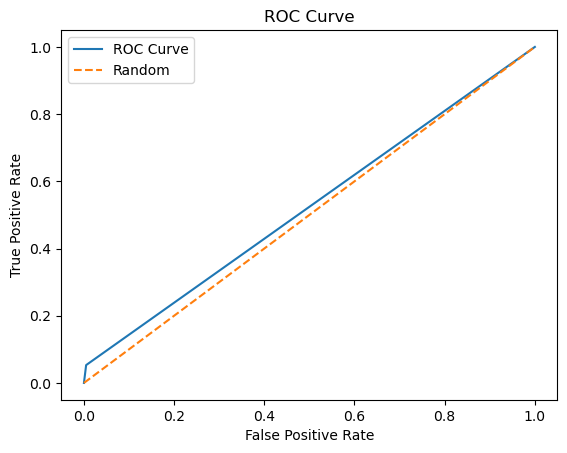

In [74]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [75]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[55431   270]
 [ 4585   257]]


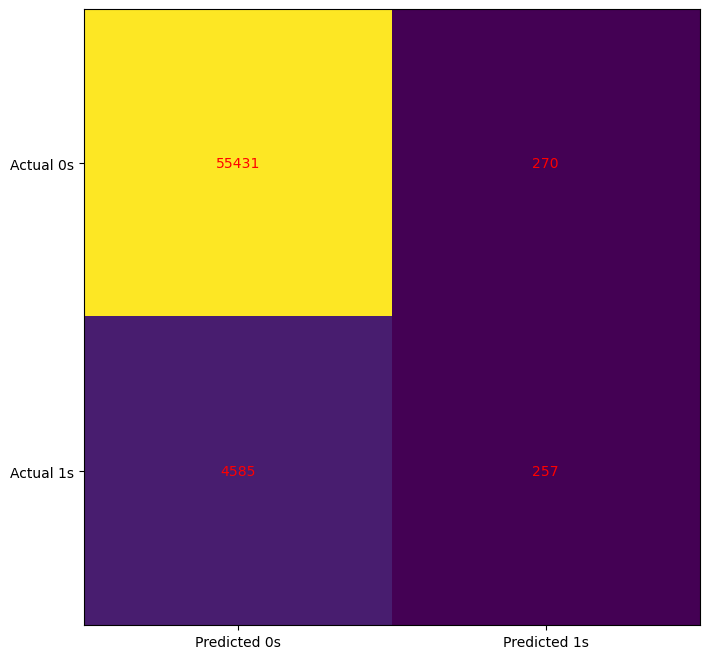

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.show()

The Logistic Regression didn't predict the test set percisely; therefore, we are going to use another way to conduct 4 more models.

# Step 5: Preprocessing for Budilding 5 Models

In [77]:
df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


0    278239
1     24474
Name: Heart_Disease, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2,random_state=22,stratify=df['Heart_Disease'])

print(train.shape)
print(test.shape)

(242170, 19)
(60543, 19)


In [79]:
yes = train['Heart_Disease'].value_counts()[0]/len(train['Heart_Disease'])*100
no = train['Heart_Disease'].value_counts()[1]/len(train['Heart_Disease'])*100
print('Train Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')
print('')

yes = test['Heart_Disease'].value_counts()[0]/len(test['Heart_Disease'])*100
no = test['Heart_Disease'].value_counts()[1]/len(test['Heart_Disease'])*100
print('Test Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')

Train Set
ratio of people with heart disease to total is 91.91518354874675
ratio of people that dont have heart disease to total is 8.084816451253252

Test Set
ratio of people with heart disease to total is 91.91483738830253
ratio of people that dont have heart disease to total is 8.085162611697472


In [80]:
## Splitting the X and y variables in the train set
X_train = train.drop("Heart_Disease", axis=1)
y_train = train["Heart_Disease"].copy()

## Splitting the X and y variables in the test set
X_test = test.drop("Heart_Disease", axis=1)
y_test = test["Heart_Disease"].copy()

In [81]:
X_train.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       56
Weight_(kg)                      292
BMI                             2375
Smoking_History                    2
Alcohol_Consumption               16
Fruit_Consumption                 51
Green_Vegetables_Consumption      39
FriedPotato_Consumption           18
dtype: int64

Creating Pipelines¶
Categorical Pipeline


In [82]:
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

In [83]:
# Numerical Pipeline¶
num_pipeline = make_pipeline(
                             FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                             StandardScaler()
                            )   

In [84]:
# Ordinal Pipelines
## Age Category Pipeline
agecat_pipeline = make_pipeline(
        OrdinalEncoder()
)

## General Health Pipeline
genhealth_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']])
)

## Checkup Pipeline
checkup_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']])
)

In [85]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 11 Categorical variables
There are 7 Numerical variables


In [86]:
# Creating the pipeline lists
## Setting each column to the pipeline where they will be used
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']

In [87]:
# Finalizing the preprocessing pipeline¶
## Combining all the pipelines and creating a main pipeline to enter all the data
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age_Category',agecat_pipeline,['Age_Category']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('Gen_health',genhealth_pipeline,['General_Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Arthritis', 'Depression', 'Diabetes',
                                  'Exercise', 'Other_Cancer', 'Sex',
                                  'Skin_Cancer', 'Smoking_History']),
                                ('Age_Category',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Age_Category']),...
                                                                              'Excellent']]))]),
                                 ['General_Health']),
                                ('Numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])

In [88]:
## Using preprocessing pipeline
print('Shape before the preprocessing:')
print(X_train.shape)

train_preprocessed = preprocessing.fit_transform(X_train)

print('Shape after the preprocessing:')
print(train_preprocessed.shape)

Shape before the preprocessing:
(242170, 18)
Shape after the preprocessing:
(242170, 20)


# Step 6: Model Training and Decide the Best Model

In [89]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=22)

In [90]:
models = {
    'Logistic_Regression':LogisticRegression(max_iter=10000,random_state=22),
    'Decision Tree':DecisionTreeClassifier(random_state=22),
    'Random_Forest':RandomForestClassifier(n_estimators=100,random_state=22),
    'K-Nearest_Neighbor':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
}

scores_dict = {}
report_dict = {}
test_predictions = {}
test_confusion_matrices = {}

In [134]:
for model_name, model in models.items():
    model_pipeline = make_pipeline(preprocessing,
                                   SMOTE(random_state=22),
                                   model
                                  )

    scores = cross_val_score(model_pipeline,
                             X_train,
                             y_train,
                             scoring='f1',
                             cv=kf,
                             n_jobs=-1,
                            )

    model_score_mean = np.mean(scores)
    scores_dict[model_name] = model_score_mean

    print('------------------------------------------------------------')
    print(f'The score for {model_name} is {model_score_mean}')

    ## fitting the pipeline for classification report
    model_pipeline.fit(X_train, y_train)
    prediction = model_pipeline.predict(X_train)
    report = classification_report(y_train, prediction, output_dict=True)
    report_dict[model_name] = report

    print('')
    print(f'This is the classification report for {model_name}:')
    report_df = pd.DataFrame(report).T
    print(report_df)

    # Print the confusion matrix
    print('')
    print(f'This is the confusion matrix for {model_name} (train set):')
    conf_matrix_train = confusion_matrix(y_train, prediction)
    print(conf_matrix_train)
    
    # Predict on the test set
    test_predictions[model_name] = model_pipeline.predict(X_test)

    # Compute and store the confusion matrix for the test set
    test_confusion_matrices[model_name] = confusion_matrix(y_test, test_predictions[model_name])

    # Print the confusion matrix for the test set
    print('')
    print(f'This is the confusion matrix for {model_name} (test set):')
    print(test_confusion_matrices[model_name])
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, test_predictions[model_name])
    precision = precision_score(y_test, test_predictions[model_name])
    recall = recall_score(y_test, test_predictions[model_name])
    f1 = f1_score(y_test, test_predictions[model_name])
    roc_auc = roc_auc_score(y_test, test_predictions[model_name])

    # Store the evaluation metrics in a dictionary
    evaluation_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }
    print('')
    print(f'Evaluation Metrics for {model_name}:')
    for metric, value in evaluation_metrics.items():
        print(f"{metric}: {value:.4f}")

    print('------------------------------------------------------------')

------------------------------------------------------------
The score for Logistic_Regression is 0.3246055095069117

This is the classification report for Logistic_Regression:
              precision    recall  f1-score        support
0              0.974861  0.731692  0.835951  222591.000000
1              0.204775  0.785484  0.324859   19579.000000
accuracy       0.736041  0.736041  0.736041       0.736041
macro avg      0.589818  0.758588  0.580405  242170.000000
weighted avg   0.912601  0.736041  0.794631  242170.000000

This is the confusion matrix for Logistic_Regression (train set):
[[162868  59723]
 [  4200  15379]]

This is the confusion matrix for Logistic_Regression (test set):
[[40703 14945]
 [ 1064  3831]]


Evaluation Metrics for {model_name}:
Accuracy: 0.7356
Precision: 0.2040
Recall: 0.7826
F1 Score: 0.3237
ROC AUC Score: 0.7570
------------------------------------------------------------
------------------------------------------------------------
The score for Decisi

# Logistic Regression with PCA

Explained Variance Ratio: [0.12605074 0.12477881 0.08493657 0.07149681 0.05783491 0.05414161
 0.04990639 0.04904043 0.04648964 0.04504347]
Cumulative Explained Variance Ratio: [0.12605074 0.25082955 0.33576612 0.40726293 0.46509784 0.51923945
 0.56914584 0.61818628 0.66467592 0.70971939]


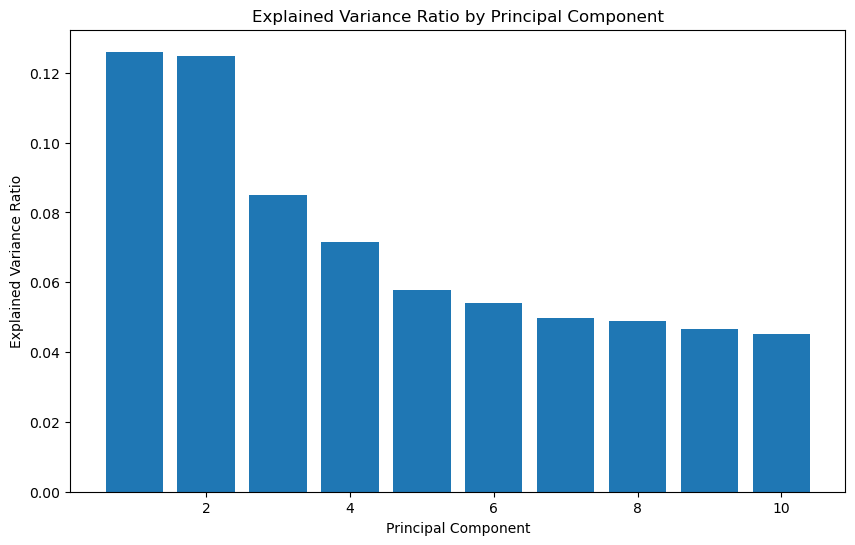

In [128]:
# Standardize the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create PCA object with 10 components
pca = PCA(n_components=10)

# Perform PCA
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Convert the result to a DataFrame
pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(10)])

# Print the explained variance ratio for the first 10 components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio for the first 10 components
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

# Optionally, you can visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [129]:
pca_df

             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       0.255007 -3.391371 -0.888593 -3.142896 -0.172636  0.906464 -0.339481   
1       1.773448 -1.074382 -0.647494 -0.142547 -2.654282  1.061828 -0.778616   
2       0.318239  0.538905 -1.486246  0.870639 -1.035048 -1.246240  0.511078   
3       2.408151  0.917093  1.245617  0.551929 -1.709883  3.323714  0.699113   
4       0.938694  1.071680  0.827129 -1.330870 -0.923600  0.386520 -1.581775   
...          ...       ...       ...       ...       ...       ...       ...   
302708 -1.688372  0.764109 -0.365664  0.752352 -0.708747 -0.197206 -0.172633   
302709 -0.262031  0.667708  0.351875 -1.297397 -1.490685  1.638203 -0.471064   
302710 -0.809586 -1.048699 -2.124595 -0.990762  0.906410  1.958336 -0.246355   
302711 -1.313751  0.571304  1.286805  0.321462 -1.134324  0.072872 -0.399640   
302712 -0.683640 -0.666253 -1.139327  1.025126 -0.548261 -0.885807 -0.649080   

             PC8       PC9      PC10  


In [130]:
pca_df = pd.DataFrame(data=x_pca[:, :4], columns=[f'PC{i+1}' for i in range(4)])
pca_df

             PC1       PC2       PC3       PC4
0       0.255007 -3.391371 -0.888593 -3.142896
1       1.773448 -1.074382 -0.647494 -0.142547
2       0.318239  0.538905 -1.486246  0.870639
3       2.408151  0.917093  1.245617  0.551929
4       0.938694  1.071680  0.827129 -1.330870
...          ...       ...       ...       ...
302708 -1.688372  0.764109 -0.365664  0.752352
302709 -0.262031  0.667708  0.351875 -1.297397
302710 -0.809586 -1.048699 -2.124595 -0.990762
302711 -1.313751  0.571304  1.286805  0.321462
302712 -0.683640 -0.666253 -1.139327  1.025126

[302713 rows x 4 columns]

In [131]:
# Split the data into training and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, df['Heart_Disease'], test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000, random_state=22)

# Train the model on the training data
model.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)

# Calculate the accuracy of the model
accuracy_train = accuracy_score(y_train_pca, y_train_pred)
accuracy_test = accuracy_score(y_test_pca, y_pred)

print("Accuracy of Train Set:", accuracy_train)
print("Accuracy of Test Set:", accuracy_test)

print("\nClassification Report of Test Set:")
print(classification_report(y_test_pca, y_pred))


Accuracy of Train Set: 0.9381963083784118
Accuracy of Test Set: 0.9388203425664404

Classification Report of Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     55701
           1       0.69      0.43      0.53      4842

    accuracy                           0.94     60543
   macro avg       0.82      0.71      0.75     60543
weighted avg       0.93      0.94      0.93     60543



In [133]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_pca, y_pred)
precision = precision_score(y_test_pca, y_pred)
recall = recall_score(y_test_pca, y_pred)
f1 = f1_score(y_test_pca, y_pred)
roc_auc = roc_auc_score(y_test_pca, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9388203425664404
Precision: 0.6885354539430086
Recall: 0.4291615035109459
F1 Score: 0.5287531806615776
ROC AUC Score: 0.7061428422026822


Confusion Matrix:
[[54761   940]
 [ 2764  2078]]


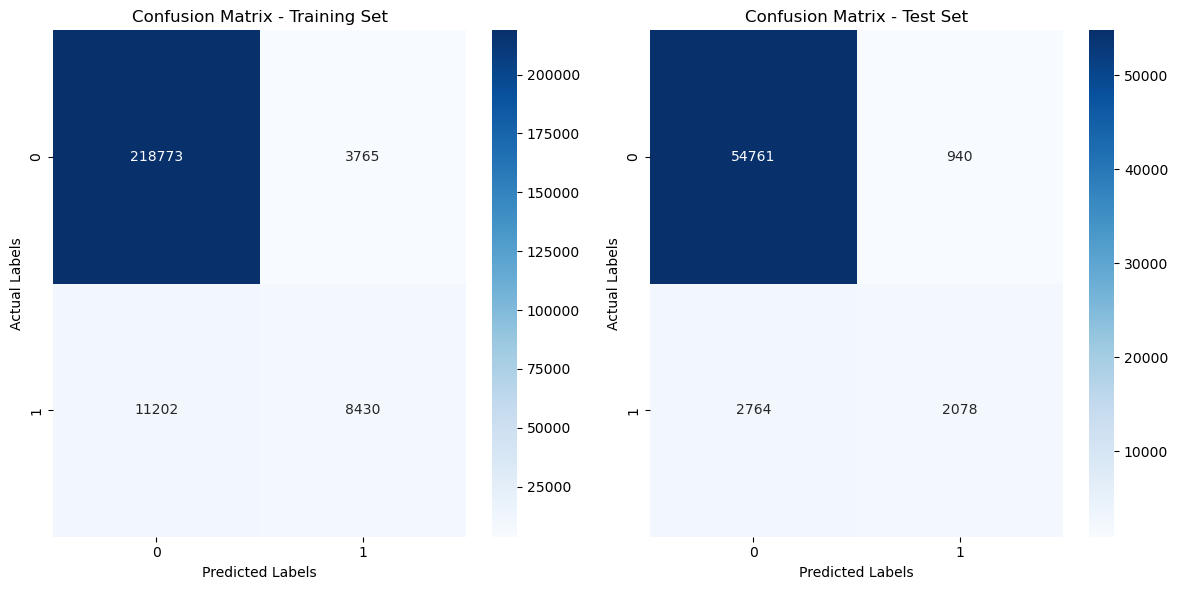

In [132]:
# Create confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train_pca, y_train_pred)

# Create confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test_pca, y_pred)

print("Confusion Matrix:")
print(conf_matrix_test)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.tight_layout()
plt.show()

# Step 7: Variables Significant

### Coefficients of Logistic with PCA

In [120]:
# Print the coefficients along with feature names
print("\nCoefficients of the Logistic Regression model:")
feature_names = X_train_pca.columns.tolist()
coefs = model.coef_[0]  # Assuming binary classification

for feature_name, coef in zip(feature_names, coefs):
    print(f"{feature_name}: {coef:.4f}")


Coefficients of the Logistic Regression model:
PC1: 1.6172
PC2: -0.2365
PC3: 1.2559
PC4: -1.0752
PC5: -0.9578
PC6: 2.4566
PC7: 0.2806
PC8: -0.6306
PC9: 0.0698
PC10: 1.2501


In [118]:
# Print the variable names with their corresponding coefficients for the first four principal components
print("\nCoefficients of the first four principal components:")
original_feature_names = data.columns.tolist()

for i, pc in enumerate(pca.components_[:4]):
    print(f"\nPrincipal Component {i+1}:")
    for feature_name, coef in zip(original_feature_names, pc):
        print(f"{feature_name}: {coef:.4f}")


Coefficients of the first four principal components:

Principal Component 1:
Height_(cm): -0.0168
Weight_(kg): 0.2781
BMI: 0.3318
Alcohol_Consumption: -0.1068
Fruit_Consumption: -0.1010
Green_Vegetables_Consumption: -0.0938
FriedPotato_Consumption: -0.0244
General_Health1: -0.3699
Checkup1: 0.1779
Exercise1: -0.2800
Heart_Disease1: 0.2820
Skin_Cancer1: 0.1479
Other_Cancer1: 0.1922
Depression1: 0.1396
Diabetes1: 0.3251
Arthritis1: 0.3552
Sex1: -0.0102
Age_Category1: 0.3296
Smoking_History1: 0.1896

Principal Component 2:
Height_(cm): 0.5030
Weight_(kg): 0.4718
BMI: 0.2684
Alcohol_Consumption: 0.0844
Fruit_Consumption: -0.1389
Green_Vegetables_Consumption: -0.1050
FriedPotato_Consumption: 0.2422
General_Health1: 0.0292
Checkup1: -0.1389
Exercise1: 0.0400
Heart_Disease1: -0.0287
Skin_Cancer1: -0.0958
Other_Cancer1: -0.1187
Depression1: -0.0573
Diabetes1: -0.0218
Arthritis1: -0.1489
Sex1: -0.4850
Age_Category1: -0.2193
Smoking_History1: 0.0336

Principal Component 3:
Height_(cm): 0.2921
W

### Coefficients and Feature Importances

In [98]:
for model_name, model in models.items():
    model_pipeline = make_pipeline(preprocessing,
                                   SMOTE(random_state=22),
                                   model
                                  )
    model_pipeline.fit(X_train, y_train)
    
    if hasattr(model_pipeline.steps[-1][1], 'coef_'):
        model = model_pipeline.steps[-1][1]
        feature_names = X_train.columns.tolist()
        coefs = model.coef_
        
        print(f'Coefficients for {model_name}:')
        for feature_name, coef in zip(feature_names, coefs[0]):
            print(f'{feature_name}: {coef}')
        print('')
    elif hasattr(model_pipeline.steps[-1][1], 'feature_importances_'):
        model = model_pipeline.steps[-1][1]
        feature_names = X_train.columns.tolist()
        feature_importances = model.feature_importances_
        
        print(f'Feature importances for {model_name}:')
        for feature_name, importance in zip(feature_names, feature_importances):
            print(f'{feature_name}: {importance}')
        print('')
    else:
        print(f'{model_name} does not have coefficients or feature importances.')

Coefficients for Logistic_Regression:
General_Health: 0.32404166841036663
Checkup: 0.19230952934924317
Exercise: -0.23665145941285778
Skin_Cancer: 0.5177605167262874
Other_Cancer: -0.3058202876658746
Depression: 0.11092767218403836
Diabetes: -0.13332381155409137
Arthritis: 0.9849773222561756
Sex: -0.10170475451248737
Age_Category: 0.4589962643793523
Height_(cm): 0.29772147758809475
Weight_(kg): -0.2856779022750435
BMI: -0.667480835052402
Smoking_History: -0.11821420146551516
Alcohol_Consumption: 0.027074005387010772
Fruit_Consumption: -0.0392276216506677
Green_Vegetables_Consumption: -0.010607317834936496
FriedPotato_Consumption: 0.023482373962536877

Feature importances for Decision Tree:
General_Health: 0.04773560175337829
Checkup: 0.016250539924633097
Exercise: 0.0034831398109885633
Skin_Cancer: 0.03240228484101209
Other_Cancer: 0.000573034963809286
Depression: 0.016323757881654754
Diabetes: 0.014466212658576217
Arthritis: 0.041337269258152703
Sex: 0.010445934566744763
Age_Category:

### Logistic Regression Coefficients Plot

                         Feature  Coefficient
0                 General_Health     0.324042
1                        Checkup     0.192310
2                       Exercise    -0.236651
3                    Skin_Cancer     0.517761
4                   Other_Cancer    -0.305820
5                     Depression     0.110928
6                       Diabetes    -0.133324
7                      Arthritis     0.984977
8                            Sex    -0.101705
9                   Age_Category     0.458996
10                   Height_(cm)     0.297721
11                   Weight_(kg)    -0.285678
12                           BMI    -0.667481
13               Smoking_History    -0.118214
14           Alcohol_Consumption     0.027074
15             Fruit_Consumption    -0.039228
16  Green_Vegetables_Consumption    -0.010607
17       FriedPotato_Consumption     0.023482


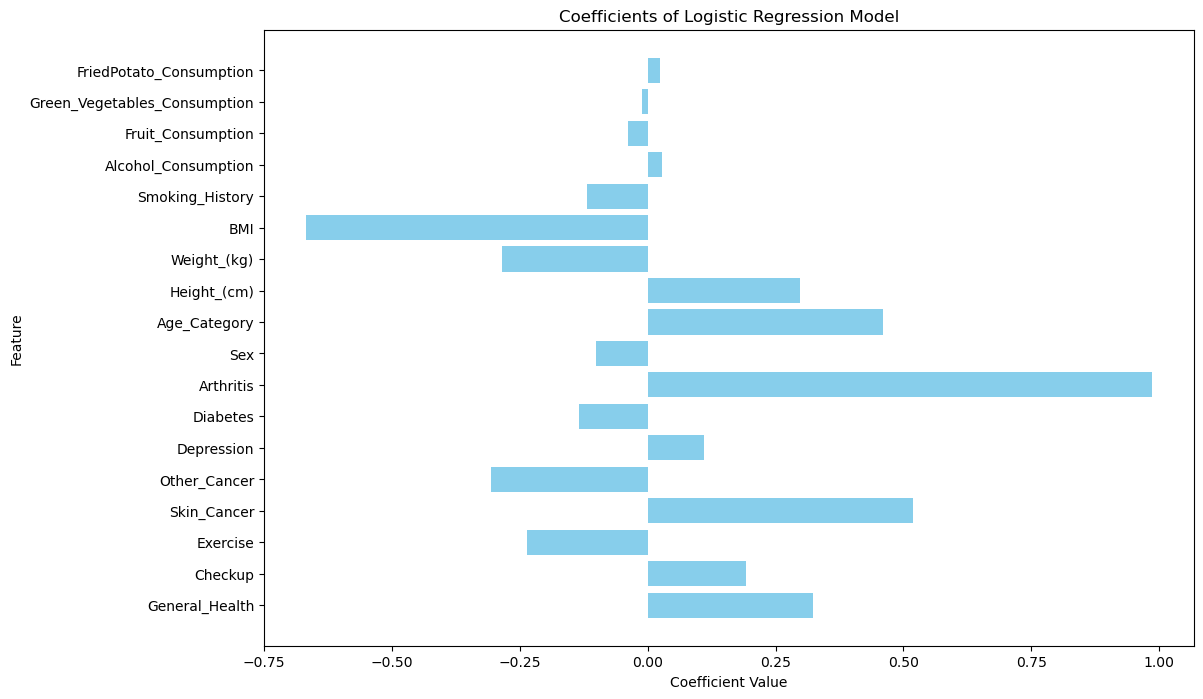

In [99]:
# Logistic Regression Coefficients
coefficients = {
    'General_Health': 0.32404166841036663,
    'Checkup': 0.19230952934924317,
    'Exercise': -0.23665145941285778,
    'Skin_Cancer': 0.5177605167262874,
    'Other_Cancer': -0.3058202876658746,
    'Depression': 0.11092767218403836,
    'Diabetes': -0.13332381155409137,
    'Arthritis': 0.9849773222561756,
    'Sex': -0.10170475451248737,
    'Age_Category': 0.4589962643793523,
    'Height_(cm)': 0.29772147758809475,
    'Weight_(kg)': -0.2856779022750435,
    'BMI': -0.667480835052402,
    'Smoking_History': -0.11821420146551516,
    'Alcohol_Consumption': 0.027074005387010772,
    'Fruit_Consumption': -0.0392276216506677,
    'Green_Vegetables_Consumption': -0.010607317834936496,
    'FriedPotato_Consumption': 0.023482373962536877
}

# Convert the dictionary to a DataFrame
df_coefficients = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])

# Print the DataFrame
print(df_coefficients)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_coefficients['Feature'], df_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')
plt.show()

### Decision Tree Feature Importances Plot

                         Feature  Importances
0                 General_Health     0.047736
1                        Checkup     0.016251
2                       Exercise     0.003483
3                    Skin_Cancer     0.032402
4                   Other_Cancer     0.000573
5                     Depression     0.016324
6                       Diabetes     0.014466
7                      Arthritis     0.041337
8                            Sex     0.010446
9                   Age_Category     0.046418
10                   Height_(cm)     0.257143
11                   Weight_(kg)     0.015057
12                           BMI     0.188089
13               Smoking_History     0.025461
14           Alcohol_Consumption     0.042449
15             Fruit_Consumption     0.042863
16  Green_Vegetables_Consumption     0.045106
17       FriedPotato_Consumption     0.044027


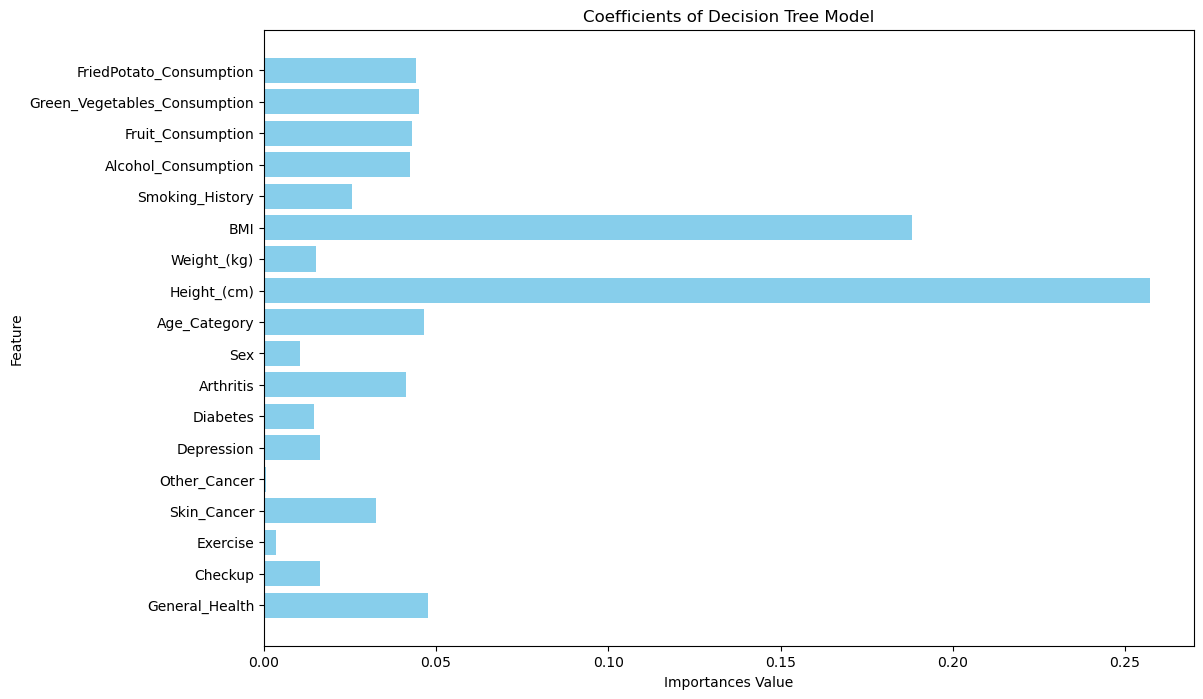

In [110]:
# Decision Tree Feature Importances
feature_importances = {
    'General_Health': 0.04773560175337829,
    'Checkup': 0.016250539924633097,
    'Exercise': 0.0034831398109885633,
    'Skin_Cancer': 0.03240228484101209,
    'Other_Cancer': 0.000573034963809286,
    'Depression': 0.016323757881654754,
    'Diabetes': 0.014466212658576217,
    'Arthritis': 0.041337269258152703,
    'Sex': 0.010445934566744763,
    'Age_Category': 0.0464176023716596,
    'Height_(cm)': 0.2571430085517102,
    'Weight_(kg)': 0.015056664008859804,
    'BMI': 0.1880886642453017,
    'Smoking_History': 0.025461013405028345,
    'Alcohol_Consumption': 0.04244945154733287,
    'Fruit_Consumption': 0.04286266938767868,
    'Green_Vegetables_Consumption': 0.045106095142990785,
    'FriedPotato_Consumption': 0.04402737825392252
}

# Convert the dictionary to a DataFrame
df_feature_importances = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importances'])

# Print the DataFrame
print(df_feature_importances)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importances'], color='skyblue')
plt.xlabel('Importances Value')
plt.ylabel('Feature')
plt.title('Coefficients of Decision Tree Model')
plt.show()

### Random Forest Feature Importances Plot

                         Feature  Importances
0                 General_Health     0.069082
1                        Checkup     0.024174
2                       Exercise     0.004279
3                    Skin_Cancer     0.058288
4                   Other_Cancer     0.000632
5                     Depression     0.030434
6                       Diabetes     0.019142
7                      Arthritis     0.033600
8                            Sex     0.017494
9                   Age_Category     0.061748
10                   Height_(cm)     0.166622
11                   Weight_(kg)     0.027952
12                           BMI     0.136184
13               Smoking_History     0.037191
14           Alcohol_Consumption     0.050387
15             Fruit_Consumption     0.045838
16  Green_Vegetables_Consumption     0.049035
17       FriedPotato_Consumption     0.049216


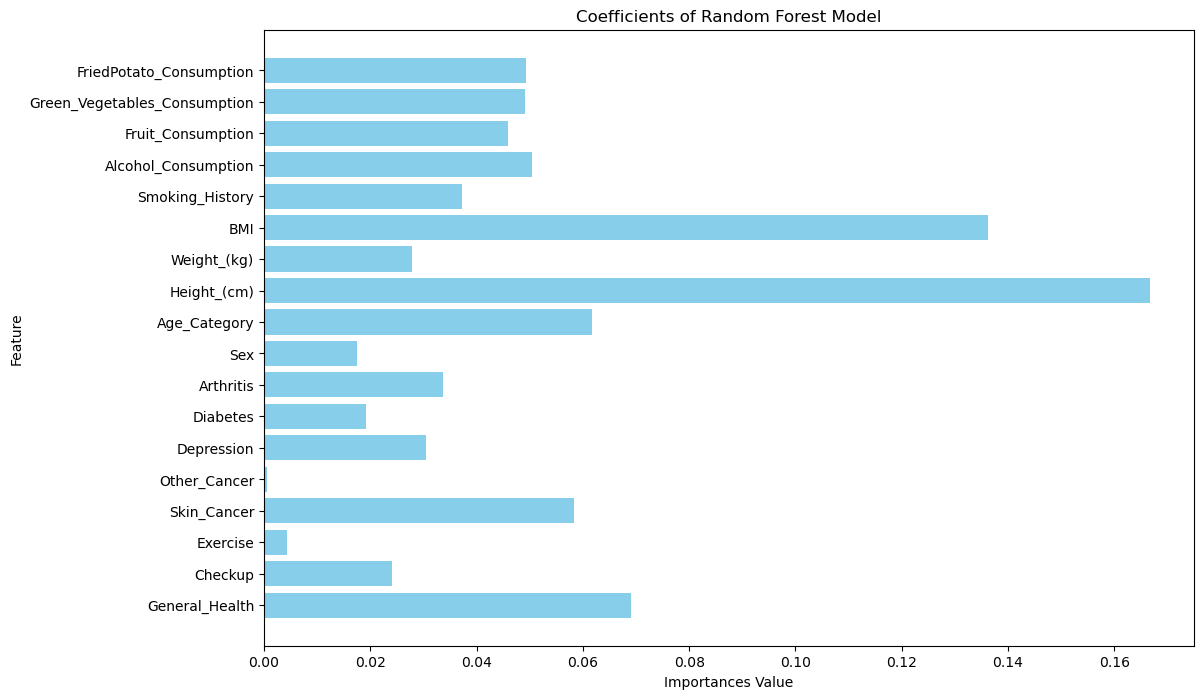

In [111]:
# Random Forest Feature Importances
feature_importances = {
    'General_Health': 0.0690817916969391,
    'Checkup': 0.024174379865624464,
    'Exercise': 0.004279095884718209,
    'Skin_Cancer': 0.05828834698051047,
    'Other_Cancer': 0.0006323238696092039,
    'Depression': 0.03043430032299227,
    'Diabetes': 0.019142295813481626,
    'Arthritis': 0.03359989161144684,
    'Sex': 0.01749409563747864,
    'Age_Category': 0.061748113519192536,
    'Height_(cm)': 0.16662242065411903,
    'Weight_(kg)': 0.027951542404188463,
    'BMI': 0.13618392905734408,
    'Smoking_History': 0.0371910010537742,
    'Alcohol_Consumption': 0.05038747015827149,
    'Fruit_Consumption': 0.045838410520385536,
    'Green_Vegetables_Consumption': 0.04903509703429214,
    'FriedPotato_Consumption': 0.049215993516802774
}

# Convert the dictionary to a DataFrame
df_feature_importances = pd.DataFrame(list(feature_importances.items()), columns=['Feature', 'Importances'])

# Print the DataFrame
print(df_feature_importances)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importances'], color='skyblue')
plt.xlabel('Importances Value')
plt.ylabel('Feature')
plt.title('Coefficients of Random Forest Model')
plt.show()

                                                   Thank You So Much !!